In [1]:
from numpy import genfromtxt, savetxt, where
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sys import exit
from sympy import init_printing, symbols, diff, exp, ln, sqrt
import sympy as sp
import numpy as np
import itertools
from stage2 import *

In [2]:
fname = "tableeos"
outname = "EOS_plot_STARS"
header1 = genfromtxt(fname, max_rows=1, dtype= 'str' )
print(header1)

['LOGT(K)' 'LOGRHO(g/cm^3)' 'LOGP(dyn/cm^2)' 'LOGPI' 'LOGPE' 'LOGPth'
 'LOGPR' 'DE']


In [3]:
names= [ 'LOGT(K)', 'LOGRHO(g/cm^3)', 'LOGP(dyn/cm^2)','LOGPI', 'LOGPE', 'LOGPth', 'LOGPR','DE']
num =[]
for n in names:
    try:
        num.append(where(header1==n)[0][0])
    except ValueError:
        exit("The given name %s did not match any entry in header1. Valid values are %s" %(n, header1))
print("Done.", num)
        

Done. [0, 1, 2, 3, 4, 5, 6, 7]


In [4]:
num= [0,1,2,3,4,5,6,7]
data =  genfromtxt(fname, skip_header=1, usecols=num)
data = data[:33158]
form = " %1.6f  %+1.6f  %+1.6f  %+1.6f  %+1.6f  %+1.6f  %+1.6f  %+1.6f  "

hdr = " Log T   Log Rho  LogP_STARS LogPI  LOGPE  LOGPTH  LOGPR  De"

savetxt(outname, data, fmt=form, delimiter='  ', header=hdr, comments='')

In [75]:
dataSTARS ='EOS_plot_STARS'
dataCh= 'EOS_plot_CH'
LogT, LogRho, LogP=  np.genfromtxt(dataCh, skip_header=1, unpack=True) 
LogT, LogRho, LogP_STARS, LogPI, LogPE, LogPTH, LogPR, De  = np.genfromtxt(dataSTARS, skip_header=1, unpack=True) 
#print(LogT.dtype)
c = np.round(np.arange(3.000000,6.550000,0.050000), 2)    #valeurs de logT 
d = np.round(np.arange(-3,2.55,0.05), 2)  # valeurs de logRho qui m'intéressent 
#LogT = LogT[4777:19108]
#LogRho = LogRho[]
#for a in LogT:
#    for b in d:
#        whereT = a==

LogTb=[]
LogRhob=[]
LogPb =[]
LogPEb=[]
LogPTHb=[]
LogPRb=[]
LogPIb=[]
Deb=[]
LogP_STARSb=[]
for m in c:
    for n in d:
        whereT = LogT==m
        whereR = LogRho==n
        where_both = np.logical_and(whereT,whereR)

        #if np.shape(np.where(whereT))[1] == 0:
            #print("weird", np.where(whereT), m, c)

        pos = np.array(np.where(where_both))[0]
        #print(pos, np.where(where_both)[0])
        if len(np.where(where_both)[0])!=0:
            LogTb.append(m)
            LogRhob.append(n)
            LogPb.append(LogP[pos][0]) 
            LogPEb.append(LogPE[pos][0])
            LogPTHb.append(LogPTH[pos][0])
            LogPRb.append(LogPR[pos][0])
            Deb.append(De[pos])
            LogPIb.append(LogPI[pos])
            LogP_STARSb.append(LogP_STARS[pos])
deltaP =10**(np.array(LogPb))-(10**(np.array(LogPEb))+10**(np.array(LogPTHb))+10**(np.array(LogPRb)))
Tb      =10**(np.array(LogTb))
Rhob    =10**(np.array(LogRhob))
Deb    = np.array(Deb)
LogPIb = np.array(LogPIb)
LogP_STARSb = np.array(LogP_STARSb) 
print(deltaP)
#print(np.shape(T), np.shape(Rho))
#logTb est une liste pas un array ! Can't do that avec des listes
#a=np.logical_not(LogP_CH<0) pourquoi il fait ca ? C est une bonne question
#LogP_CH[a]
#LogT[a]
#LogRho[a]
#print(min(deltaP))

[ 2.58052660e+07  2.66683173e+07  2.69204157e+07 ... -1.94180013e+17
 -2.28218671e+17 -2.68569586e+17]


In [77]:
m=[]
n=[]
a=[3.00000000,3.20000005,3.40000010, 3.6,3.9, 4.00000000,4.4,4.4000000, 4.59999990, 4.2, 5.00000000]   

for i in a:
    pos=np.where(LogT==i)
    m.append(LogRho[pos])
    n.append(LogPI[pos])   
    


In [78]:
#controler la taille de la figure
plt.rcParams['figure.figsize'] = [11, 11] #[largeur, hauteur]

#création de la figure
f = plt.figure()

#gérer l'écartement entre subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05) #wspace = écartement horizontal, #vspace=vertical ?
#je me disais aussi 
#faut copier et coller okay je m'ne charge 

<Figure size 792x792 with 0 Axes>

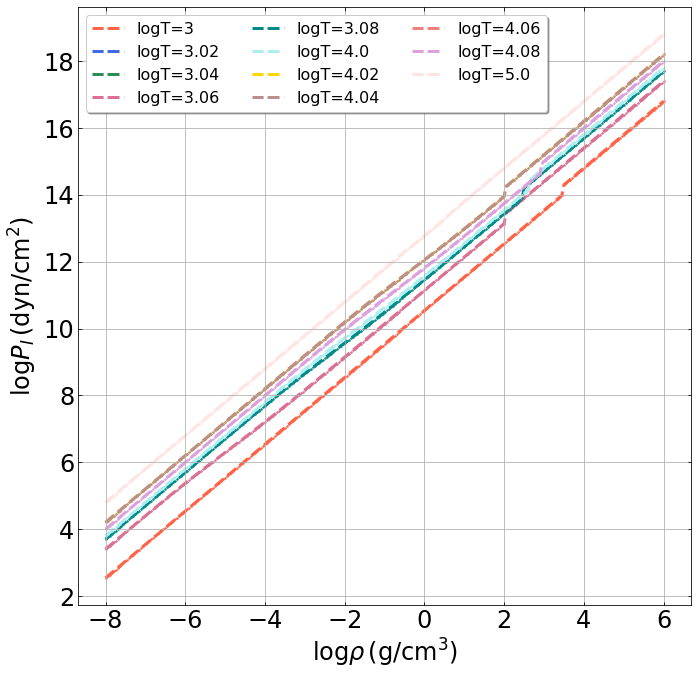

In [79]:
Ax, LW= asManyPlots(111, m, n,
                    xlabel=r'$\log\rho \, (\rm{g/cm^{3}}$)', ylabel=r'$\logP_I \, (\rm{dyn/cm^{2}})$',  
                    markerSize=3, linestyle=['--','--','--','--','--','--','--','--','--','--','--'], 
                    marker=['.','.','.','.','.','.','.','.','.','.','.'], 
                    color=['tomato', 'royalblue','seagreen','palevioletred', 
                    'darkcyan','paleturquoise','gold','rosybrown','lightcoral','plum','mistyrose'], 
                    label=['logT=3','logT=3.02','logT=3.04','logT=3.06','logT=3.08','logT=4.0','logT=4.02','logT=4.04',
                    'logT=4.06','logT=4.08','logT=5.0'], showLegend=True,
                    locLegend= 'upper left', legendNcols=3, legendTextSize=16,
                    plotFlag=[True, True, True, True, True, True, True, True, True, True, True])

plt.savefig("plot_deltaP", bbox_inches='tight')

In [98]:
print(np.shape(LogPI), np.shape(T))

(33158,) (33158,)


In [ ]:
#plt.rcParams['figure.figsize'] = [11, 11] #[largeur, hauteur]

#création de la figure
#f = plt.figure()
#plt.subplots_adjust(wspace=0.05, hspace=0.05) #wspace = écartement horizontal, #vspace=vertical ?
#coucou. Tu as garde T et Rho qui tinteresse mais t'as pas Ne

In [76]:
# création de la grille
X, Y = np.meshgrid(np.sort(np.unique(Tb)), np.sort(np.unique(Rhob)))
Z = np.copy(X)
ZL = np.copy(X)
ZStars = np.copy(X)
#DebVector = np.copy(Deb)
#Deb = Deb.reshape(np.shape(X))  
LogPIb = LogPIb.reshape(np.shape(X))
LogP_STARSb = LogP_STARSb.reshape(np.shape(X))


In [8]:


size1 = np.shape(X)[0]
size2 = np.shape(Y)[0]
#2 dimension, première dimension= vecteur 
# une liste de liste =>deux boucles 
for index1, x, y in zip(range(size1), X, Y):
    for index2, valX, valY in zip(range(size2), x, y):
        whereX = T == valX
        whereY = Rho == valY
        whereX_and_Y = np.logical_and(whereX,whereY)
        position = np.array(np.where(whereX_and_Y))[0][0]
        valZ = np.abs((deltaP[position]))
        
        
        valZ_ST = LogPI[position]
        print(position, LogPI[position], valZ_ST)

        #if np.shape(valZ)==(1,) :
        Z[index1, index2] =  valZ
        ZL[index1, index2] = np.log(valZ)/np.log(10.)
        ZStars[index1, index2] = valZ_ST



NameError: name 'T' is not defined

In [40]:
LogPI[position]

IndexError: index 281 is out of bounds for axis 0 with size 281

In [ ]:

ax = plt.subplot(111)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', direction='in', labelsize=26)

ax.set_xscale('log')
ax.set_yscale('log')
dt = ax.contourf(Y, X, Z, 200, cmap='PuRd')
col = plt.colorbar(dt)
col.set_label(r'$\Delta P \, (\rm{dyn/cm^{2}})$', size=26)
ax.set_xlabel(r'$\rho \, \rm{(g/cm^{3})}$', size=26)
ax.set_ylabel(r'$T \, \rm{(K)}$', size=26)
#pour l'esthetique on augmente la taille des ticks de la colorbar (pour faire pro ;))
col.ax.tick_params(labelsize=22)
cont = plt.contour(Y, X, Z, levels=[0.5,1], colors='black', linestyle='--')
cont.clabel(fontsize=10)

#plt.savefig("inconsistency_STARS_Beck.pdf", bbox_inches='tight')

(111, 51)


In [9]:
def P(L,c1,c2,c3,c4):
    #global Ne, Rho, T
    a      = 1.07654
    b      = 0.61315 
    #m      =  0.76475763586061185 
    boltzm = 1.380658*10**(-16) 
    m_H    = 1.673*10**(-24)
    Rhob, Tb = L
    x      = Deb.reshape(np.shape(Tb))
    #x = x.astype(float)
    y      = 13.6/(boltzm*Tb)
    g      = 13.6/y*c2*(c1/x)**c2*(c3*np.log(1 + x/c4) + y + 2*np.sqrt(a*x*y**1.5*(b*x*y**1.5 + 1)**0.333333333333333))*np.exp(-(c1/x)**c2)/x + (c3/(c4*(1 + x/c4)) + 2*y**(-1.5)*np.sqrt(a*x*y**1.5*(b*x*y**1.5 + 1)**0.333333333333333)*(b*x*y**1.5 + 1)**(-0.333333333333333)*(0.166666666666667*a*b*x*y**3.0*(b*x*y**1.5 + 1)**(-0.666666666666667) + a*y**1.5*(b*x*y**1.5 + 1)**0.333333333333333/2)/(a*x))*np.exp(-(c1/x)**c2)  
    return(g.ravel())
#x*Rho*

In [107]:
para,cov=curve_fit(P,(X,Y),Z.ravel(),bounds=([-np.inf,-np.inf,-np.inf,0],[np.inf,np.inf,np.inf,np.inf]),method='dogbox')


In [108]:
print(cov)

[[3.77366797e-34 1.50508804e-20 0.00000000e+00 0.00000000e+00]
 [1.50508804e-20 6.00288634e-07 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [14]:
print(np.shape(P((X,Y),*para)),np.shape(P((10**4,10**5),3,0.25,2,0.03)))

[[8.38690918e-25 9.41026688e-25 1.05584931e-24 ... 4.71630562e-19
  5.29178195e-19 5.93747700e-19]
 [8.38690918e-25 9.41026688e-25 1.05584931e-24 ... 4.71630562e-19
  5.29178195e-19 5.93747700e-19]
 [8.38690918e-25 1.26133107e-24 4.45696931e-23 ... 4.71630562e-19
  5.29178195e-19 5.93747700e-19]
 ...
 [1.99540852e-22 2.23888518e-22 2.51207049e-22 ... 1.12210067e-16
  1.25901766e-16 1.41264105e-16]
 [1.99540852e-22 2.23888518e-22 2.51207049e-22 ... 1.12208738e-16
  1.25900424e-16 1.41262599e-16]
 [1.99538961e-22 2.23886397e-22 2.51204966e-22 ... 1.12210067e-16
  1.25901766e-16 1.41264105e-16]]
[[5.93747700e-23 5.93747700e-23 5.93747700e-23 ... 5.93747700e-23
  5.93747700e-23 5.93747700e-23]
 [5.93747700e-23 5.93747700e-23 5.93747700e-23 ... 5.93747700e-23
  5.93747700e-23 5.93747700e-23]
 [5.93747700e-23 7.95846100e-23 2.50633803e-21 ... 5.93747700e-23
  5.93747700e-23 5.93747700e-23]
 ...
 [1.41264105e-20 1.41264105e-20 1.41264105e-20 ... 1.41264105e-20
  1.41264105e-20 1.41264105e-20]

In [50]:
print(np.shape(Y),np.shape(Z))

(111, 51) (111, 51)


In [77]:
#ZStars= P((X,Y),*para).reshape(np.shape(X))
#ZStars=(P((X,Y),3,0.25,2,0.03)).reshape(np.shape(X))
#ZStars2 = (10**(LogPI)-10**(LogP_STARS))/10**(LogP_STARS)
ZStars2 = LogPIb - LogP_STARSb
#print(np.shape(Rho),np.shape(T))

In [92]:
np.where(np.log10(ZStars)==np.nan)

(array([], dtype=int64), array([], dtype=int64))

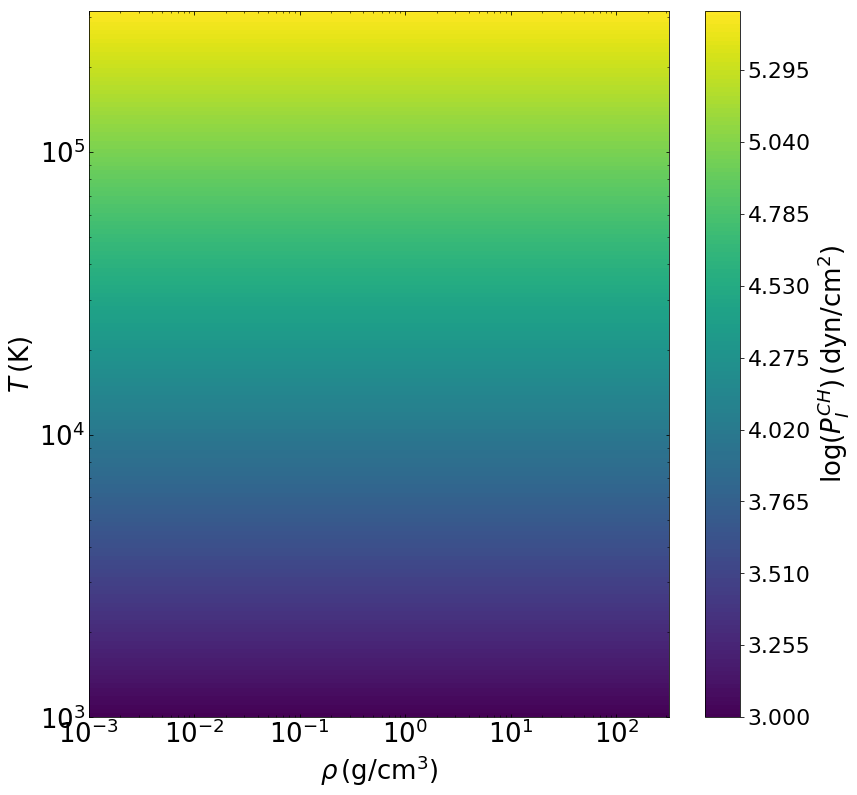

In [20]:
#controler la taille de la figure
plt.rcParams['figure.figsize'] = [13, 13] #[largeur, hauteur]

#création de la figure
f = plt.figure()
plt.subplots_adjust(wspace=0.5, hspace=0.05) #wspace = écartement horizontal, #vspace=vertical ?
ax = plt.subplot(111)


ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', direction='in', labelsize=26)

ax.set_xscale('log')
ax.set_yscale('log')
 
dt = ax.contourf(Y, X, np.log10(ZStars), 200, cmap='viridis') #cmap='PuRd')


col = plt.colorbar(dt)
col.set_label(r'$\log(P_I^{CH}) \, (\rm{dyn/cm^{2}})$', size=26)
ax.set_xlabel(r'$\rho \, \rm{(g/cm^{3})}$', size=26)
ax.set_ylabel(r'$T \, \rm{(K)}$', size=26)
col.ax.tick_params(labelsize=22)

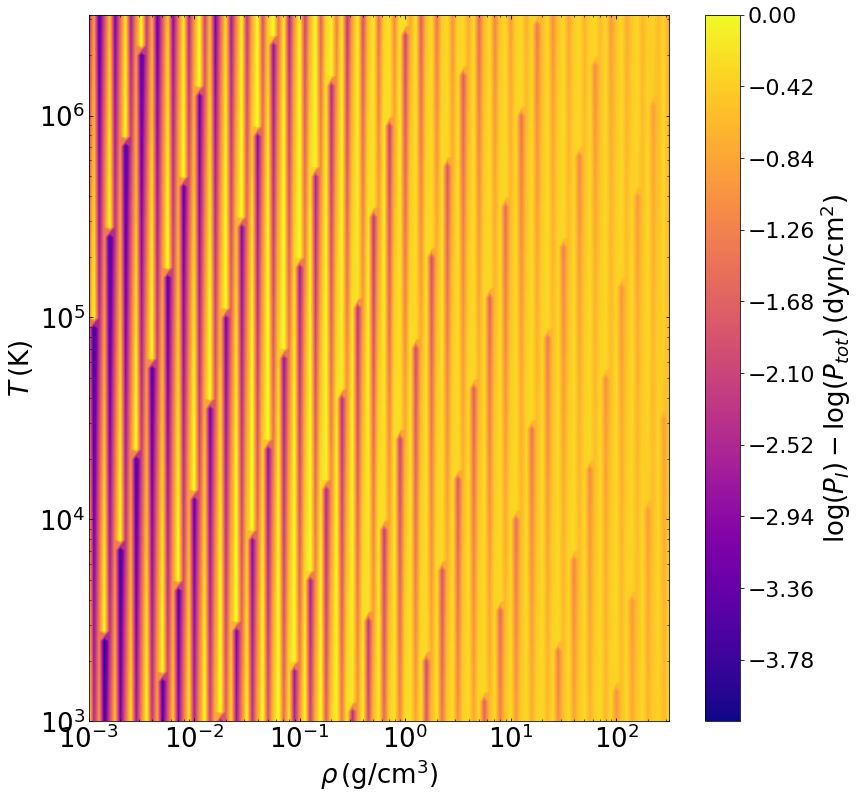

In [79]:
plt.rcParams['figure.figsize'] = [13, 13] #[largeur, hauteur]


#cont = plt.contour(Y, X, np.log10(ZStars), levels=[5,10,15], colors='black', linestyle='--')
#cont.clabel(fontsize=10)
#################################

ax = plt.subplot(111)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', direction='in', labelsize=26)

ax.set_xscale('log')
ax.set_yscale('log')
 
dt = ax.contourf(Y, X, ZStars2, 250, cmap='plasma' ) #cmap='PuRd')


col = plt.colorbar(dt)
col.set_label(r'$\log(P_I) - \log(P_{tot}) \, (\rm{dyn/cm^{2}})$', size=26)
ax.set_xlabel(r'$\rho \, \rm{(g/cm^{3})}$', size=26)
ax.set_ylabel(r'$T \, \rm{(K)}$', size=26)
col.ax.tick_params(labelsize=22)


#cont = plt.contour(Y, X, ZStars2)
#cont.clabel(fontsize=10)

plt.savefig("iprepdf", bbox_inches='tight')

In [155]:


g = x**2/m_H*c2*13.6/y*(c1/x)**c2*(c3*np.log(1 + x/c4) + y + 2*np.sqrt(a*x*y**1.5*(b*x*y**1.5 + 1)**0.333333333333333))*np.exp(-(c1/x)**c2)/x + (c3/(c4*(1 + x/c4)) + 2*y**(-1.5)*np.sqrt(a*x*y**1.5*(b*x*y**1.5 + 1)**0.333333333333333)*(b*x*y**1.5 + 1)**(-0.333333333333333)*(0.166666666666667*a*b*x*y**3.0*(b*x*y**1.5 + 1)**(-0.666666666666667) + a*y**1.5*(b*x*y**1.5 + 1)**0.333333333333333/2)/(a*x))*np.exp(-(c1/x)**c2)  
plot(g)


NameError: name 'plot' is not defined